# KLASIFIKASI DATASET STATLOG (HEART)
Oleh        :Tria Ayu Lestari (06211540000060)
/ Mata Kuliah : Data Mining A

Dataset terdiri dari kelas label (Group) yang berisi Absence (1) atau presence (2) of heart disease. Berdasarkan 13 atri-but yang ada di atas kelas label ini akan menghasilkan kelompok data yang terdiri dari 2, yaitu ada atau tidak adanya penyakit jantung. Dilihat dari data set tersebut, maka digunakan metode data mining yang paling tepat, yaitu klasifikasi. Apa sih klasifikasi itu?? Dalam data mining klasifikasi termasuk dalam metode prediksi, yaitu metode yang menggunakan beberapa variabel untuk memprediksi nilai yang belum diketahui (unknown) atau nilai selanjutnya (future) dari variabel lain. Dimana dalam langkah klasifikasi sebagai berikut:

     Terdapat sejumlah record/data yang disebut (training set), yaitu record yang
      terdiri dari sejumlah atribut dan salah satunya merupakan atribut kelas /label/Group.
     Dengan training set itu kita dapat mencari model untuk atribut kelas sebagai fungsi nilai dari atribut lain.
     Tujuannya adalah dengan model itu kita dapat memprediksi sesuai Groupnya seakurat mungkin record/data yang 
      belum diketahui kelasnya.
     Untuk mengetahui dan menentukan tingkat akurasi model maka digunakan yang namanya test set, 
      yaitu beberapa data yang digunakan untuk menguji model yang telah dibuat diantaranya 
      menggunakan metode Decission Tree, Bagging, Random Forest (RF), Gradient Boosting (GB), Adaptive Boosting (AB), 
      Naive Bayes (NB), dan kNN.
     Jadi dalam klasifikasi biasanya dataset akan dibagi menjadi dua bagian yang pertama untuk pembangunan 
      model (training set) dan yang kedua sebagai data untuk memvalidasi model (test set).

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pylab.rcParams['figure.figsize'] = (5, 3)

Populating the interactive namespace from numpy and matplotlib


## Dataset

In [2]:
data = pd.read_csv('D:/Statlog.csv')
data.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Serum Cholestoral (mg/dl),Fasting Blood Sugar >120 mg/dl,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise Induced Angina,Oldpeak,The Slope of The Peak Exercise ST Segment,Number of Major Vessels (0-3) Colored by Flourosopy,Thal,Group
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [3]:
data.shape

(270, 14)

# A. Eksplorasi Data
Keterangan : (Group = 1) = No Heart Disease / (Group=2) = Heart Disease

In [4]:
data['Group'].value_counts()

1    150
2    120
Name: Group, dtype: int64

In [5]:
data['Group'].value_counts(normalize=True)

1    0.555556
2    0.444444
Name: Group, dtype: float64

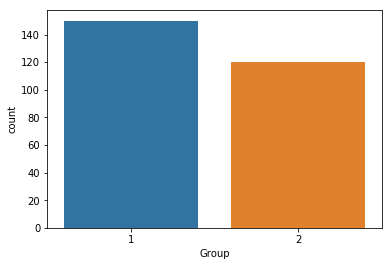

In [6]:
sns.countplot(x=data.Group)
plt.show()

### Korelasi
Menghitung nilai korelasi digunakan untuk mengetahui hubungan antar variabel yang ingin diketahui.

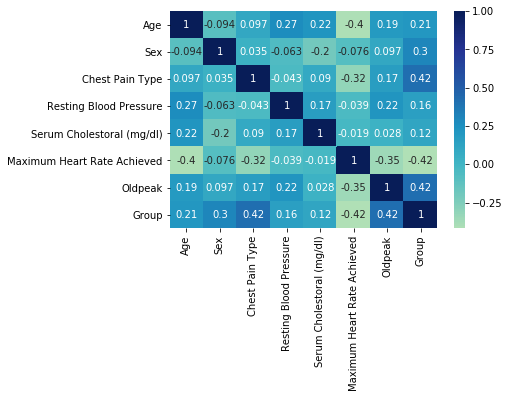

In [7]:
corr_val=data[['Age','Sex','Chest Pain Type','Resting Blood Pressure', 'Serum Cholestoral (mg/dl)',
                      'Maximum Heart Rate Achieved','Oldpeak','Group']].corr()
sns.heatmap(corr_val, annot=True, cmap="YlGnBu", center=0)

### Matrix Plot

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\TRIA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\TRIA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\TRIA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\TRIA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


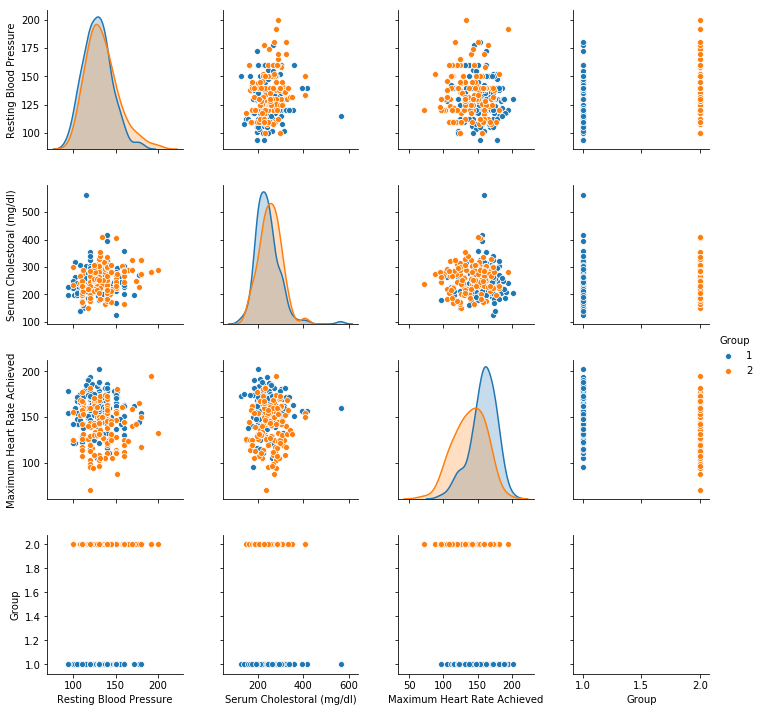

In [9]:
sns.pairplot(data=data[['Resting Blood Pressure', 'Serum Cholestoral (mg/dl)', 'Maximum Heart Rate Achieved', 'Group']], 
             hue='Group')
plt.show()

# B. Klasifikasi

## Train-Test Split Data

In [10]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [11]:
y = data['Group']
x = data.drop(['Group'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 123)

## Training Model dan Prediksi

### 1. Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [13]:
DecisionTree = tree.DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
DecisionTree.score(x_train, y_train)

1.0

In [15]:
DecisionTree.score(x_test, y_test)

0.7205882352941176

In [16]:
import pydotplus
import collections
from sklearn.externals.six import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz

In [17]:
DecisionTree = DecisionTree.fit(x_train, y_train)

In [18]:
data_feature_names = [ 'Age','Sex','Chest Pain Type','Resting Blood Pressure', 'Serum Cholestoral (mg/dl)',
                      'Fasting Blood Sugar >120 mg/dl', 'Resting Electrocardiographic Results','Maximum Heart Rate Achieved',
                      'Exercise Induced Angina','Oldpeak','The Slope of The Peak Exercise ST Segment',
                      'Number of Major Vessels (0-3) Colored by Flourosopy','Thal']
dot_data=StringIO()
dot_data=tree.export_graphviz(DecisionTree,feature_names=data_feature_names,
                                out_file=None,filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
        
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
graph.write_png('dotfile.png')


True

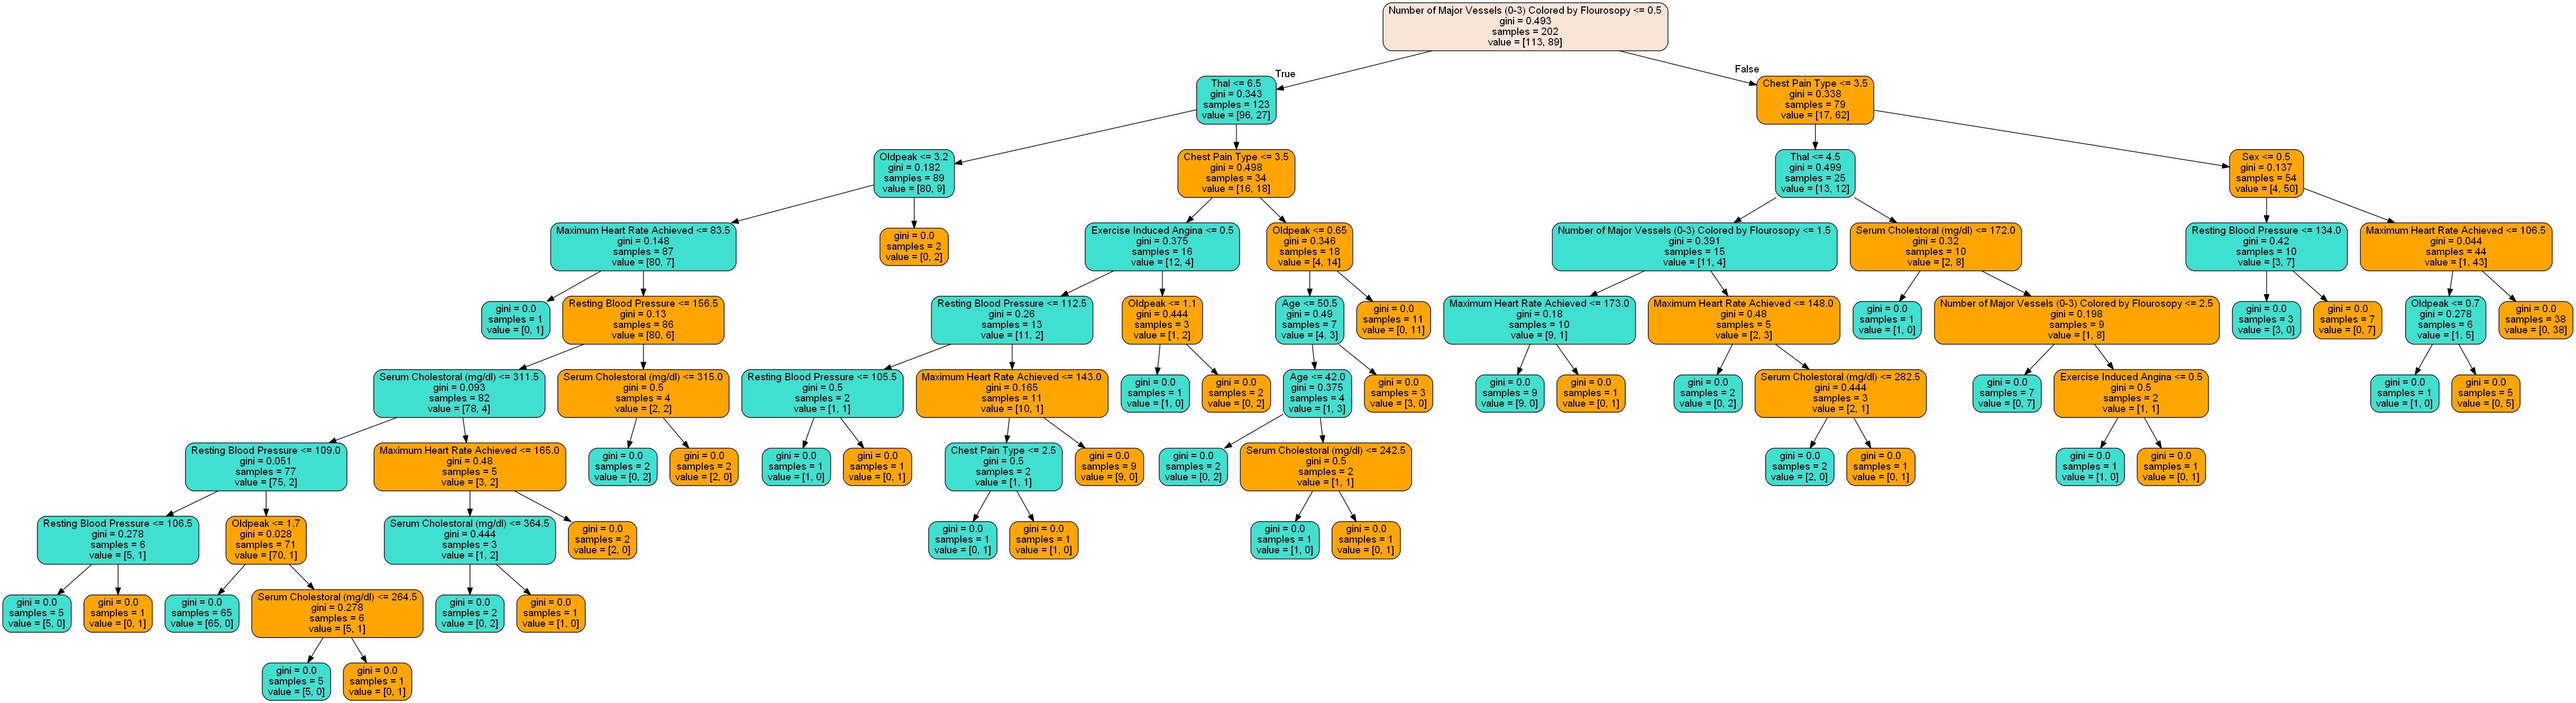

In [19]:
from IPython.display import Image
Image(filename = 'dotfile.png')

### 2.  Bagging

In [20]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, \
                        AdaBoostClassifier, GradientBoostingClassifier

C:\Users\TRIA\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [21]:
Bagging = BaggingClassifier(random_state=123)
Bagging.fit(x_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=123,
         verbose=0, warm_start=False)

In [22]:
Bagging.score(x_train, y_train)

0.9900990099009901

In [23]:
Bagging.score(x_test, y_test)

0.7941176470588235

### 3. Random Forest

In [24]:
RF = RandomForestClassifier(random_state=123)
RF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [25]:
RF.score(x_train, y_train)

0.9851485148514851

In [26]:
RF.score(x_test, y_test)

0.7794117647058824

### 4. Gradient Boosting

In [27]:
GB = GradientBoostingClassifier(random_state=123)
GB.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False)

In [28]:
GB.score(x_train, y_train)

1.0

In [29]:
GB.score(x_test, y_test)

0.8235294117647058

### 5. Adaptive Boosting

In [30]:
AB = AdaBoostClassifier(random_state=123)
AB.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=123)

In [31]:
AB.score(x_train, y_train)

0.9455445544554455

In [32]:
AB.score(x_test, y_test)

0.8235294117647058

### 6. Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
nb = GaussianNB()

In [35]:
# fit train set using Gaussian Naive Bayes
nb.fit(x_train, y_train)

GaussianNB(priors=None)

In [36]:
# compute the accuracy of train set
nb.score(x_train, y_train)

0.8663366336633663

### 7. kNN Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# set the kNN classifier, k = 5, weight = uniform
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#### #KNN with Cross Validation

In [39]:
from sklearn.model_selection import KFold, cross_val_score
y = data['Group']
X = data.drop(['Group'], axis=1)
k_fold = KFold(n_splits=10)
akurasi = cross_val_score(knn, X, y, cv=k_fold, scoring='accuracy')
presisi = cross_val_score(knn, X, y, cv=k_fold, scoring='precision')
recalls = cross_val_score(knn, X, y, cv=k_fold, scoring='recall')

#### #The best K

In [40]:
k_range = range(1, 20)
k_akurasi = []
k_presisi = []
k_recalls = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    akurasi = cross_val_score(knn, X, y, cv=k_fold, scoring='accuracy')
    k_akurasi.append(akurasi.mean())
    presisi = cross_val_score(knn, X, y, cv=k_fold, scoring='precision')
    k_presisi.append(presisi.mean())
    recalls = cross_val_score(knn, X, y, cv=k_fold, scoring='recall')
    k_recalls.append(recalls.mean())

Text(0,0.5,'Cross-validated Value')

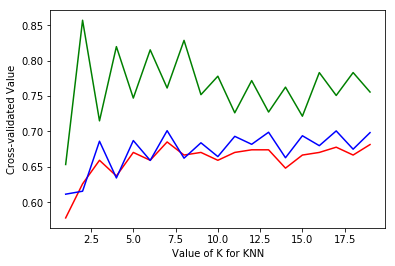

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, k_akurasi, color='red')
plt.plot(k_range, k_presisi, color='blue')
plt.plot(k_range, k_recalls, color='green')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated Value')

In [42]:
# fit train set using kNN
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')

In [43]:
print(akurasi.mean())
print(presisi.mean())
print(recalls.mean())

0.6814814814814814
0.698350930115636
0.7557721934927817


In [44]:
# compute the accuracy of train set
knn.score(x_train, y_train)

0.7079207920792079

# C. Test Set Prediction

In [45]:
# create a list contained classifier names 
classif_name = ['DecisionTree','Bagging','RF','GB','AB','NB', 'kNN']


# create an empty dictionary for y predict
y_predict = {}

# add new keys in the dictionary and assign the prediction results
y_predict['DecisionTree'] = DecisionTree.predict(x_test)
y_predict['Bagging'] = Bagging.predict(x_test)
y_predict['RF'] = RF.predict(x_test)
y_predict['GB'] = GB.predict(x_test)
y_predict['AB'] = nb.predict(x_test)
y_predict['NB'] = nb.predict(x_test)
y_predict['kNN'] = knn.predict(x_test)

## 1. Model Evaluation

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score

### #Confusion Matrix

In [47]:
# get the species names
Group = data['Group'].unique()

# create an empty dictionary for confusion matrices
conf_matrix = {}

# add new keys and assign the confusion matrices results
for name in classif_name:
    conf_matrix[name] = pd.DataFrame(data=confusion_matrix(y_test, y_predict[name]), 
                                     columns=Group, 
                                     index=Group)

In [48]:
conf_matrix['DecisionTree']

,2,1
2,26,11
1,8,23


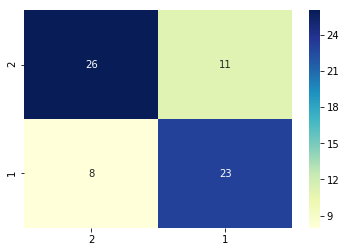

In [49]:
# create heatmap for confusion matrix
sns.heatmap(conf_matrix['DecisionTree'], annot=True, cmap="YlGnBu")
plt.show()

In [50]:
conf_matrix['Bagging']

,2,1
2,32,5
1,9,22


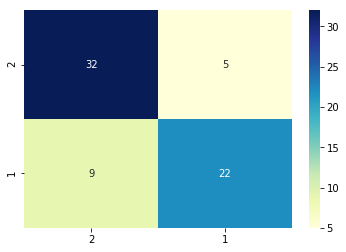

In [51]:
# create heatmap for confusion matrix
sns.heatmap(conf_matrix['Bagging'], annot=True, cmap="YlGnBu")
plt.show()

In [52]:
conf_matrix['RF']

,2,1
2,32,5
1,10,21


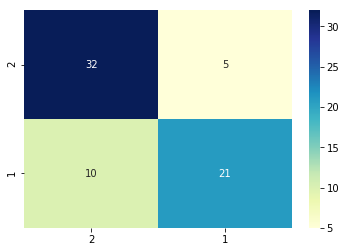

In [53]:
# create heatmap for RF confusion matrix
sns.heatmap(conf_matrix['RF'], annot=True, cmap="YlGnBu")
plt.show()

In [54]:
conf_matrix['GB']

,2,1
2,31,6
1,6,25


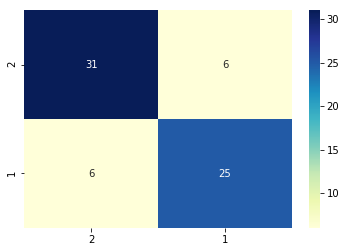

In [55]:
# create heatmap for GB confusion matrix
sns.heatmap(conf_matrix['GB'], annot=True, cmap="YlGnBu")
plt.show()

In [56]:
conf_matrix['AB']

,2,1
2,33,4
1,6,25


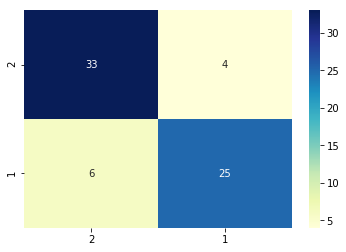

In [57]:
# create heatmap for AB confusion matrix
sns.heatmap(conf_matrix['AB'], annot=True, cmap="YlGnBu")
plt.show()

In [58]:
conf_matrix['NB']

,2,1
2,33,4
1,6,25


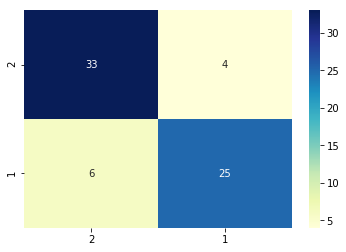

In [59]:
# create heatmap for NB confusion matrix
sns.heatmap(conf_matrix['NB'], annot=True, cmap="YlGnBu")
plt.show()

In [60]:
conf_matrix['kNN']

,2,1
2,32,5
1,17,14


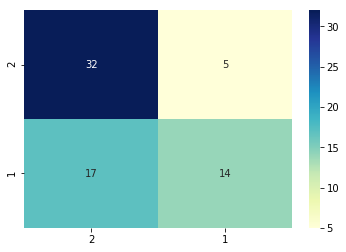

In [61]:
# create heatmap for kNN confusion matrix
sns.heatmap(conf_matrix['kNN'], annot=True, cmap="YlGnBu")
plt.show()

# D. Accuracy

In [62]:
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

DecisionTree accuracy = 0.7206
Bagging accuracy = 0.7941
RF accuracy = 0.7794
GB accuracy = 0.8235
AB accuracy = 0.8529
NB accuracy = 0.8529
kNN accuracy = 0.6765


# E. Kesimpulan

Dengan demikian dapat diketahui pada dataset Statlog(Heart) yang terdiri dari 2 kelas (Group) yaitu (Group=1) untuk 
orang yang tidak terkena penyakit jantung dan (Group=2) untuk orang yang terkena penyakit jantung dengan jumlah variabel prediktor sebanyak 13 variabel yang terdiri dari variabel numerik dan kategorik. Berdasarkan dari perhitungan nilai akurasi dari klasifikasi menurut metode yang telah digunakan diantaranya dengan menggunakan metode Decission Tree, Bagging, Random Forest (RF), Gradient Boosting (GB), Adaptive Boosting (AB), Naive Bayes (NB), dan kNN, diperoleh nilai akurasi yang paling baik dalam memprediksi status penyakit jantung tersebut adalah dengan menggunakan Adaptive Boosting (AB) dan Naive Bayes (NB) yaitu sebesar 85,29%. Nilai akurasi tersebut menjelaskan bahwa dengan menggunakan kedua metode itu, maka peluang dalam memprediksi status penyakit jantung dengan tepat yaitu sekitar 85,29% dari 100% keseluruhan data.